In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [2]:
np.random.seed(42)
X, y = make_blobs(n_samples=100, n_features=4, centers=3, shuffle=True)
n_clusters = len(np.unique(y))
print(n_clusters)

3


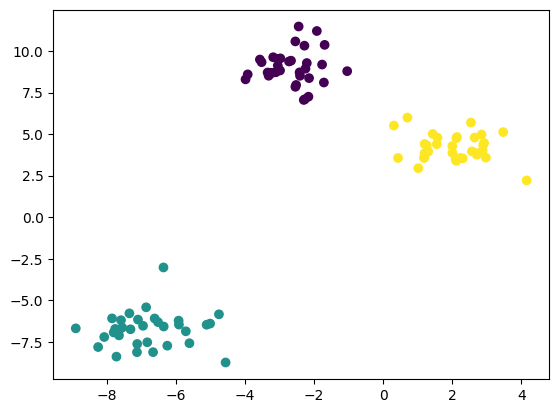

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:,1], c=y)

In [4]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
class KMeans:
    def __init__(self, K=2, max_iters=5, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def train(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialze the centroids with some random sample
        centroid_idx = np.random.choice(self.n_samples, self.K, replace=False)
        #add to the centoid list the randomly chosen samp
        self.centroids = [self.X[idx] for idx in centroid_idx]

        for _ in range(self.max_iters):
            self.clusters = self.update_clusters(self.centroids)
           
        

            if self.plot_steps:
                labels = self.get_labels(self.clusters)
                self.plot(self.centroids, labels)

            self.centroids = self.update_centroids(self.clusters)
                

        

    def update_clusters(self, centroids):
        #create an empty list for each cluster 
        clusters = [[] for _ in range(self.K)]
        #assign each sample to a cluster based on the centroid it is closest to 
        for sample_idx, sample in enumerate(self.X):
            #calculate the euclidean distance from each centroid
            distances = [euclidean_distance(centroid, sample) for centroid in centroids]
            closest_cluster_idx = np.argmin(distances)
            
            
            #add the sample idx (index) to a cluster based on the shortest_distance_idx
            clusters[closest_cluster_idx].append(sample_idx)


        return clusters
    
    def update_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        #note that the clusters contain the sample indexes
        for cluster_idx, cluster in enumerate(clusters):
            #calculate the mean of the samples in the cluster 
            cluster_samples_mean = np.mean(self.X[cluster], axis=0)
            #update the centroid with the mean
            centroids[cluster_idx] = cluster_samples_mean
        
        return centroids
    
    def get_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def plot(self, centroids, labels):
        pca = PCA(n_components=2)
        fig, ax = plt.subplots()
        clear_output(wait=True)
        data_2d = pca.fit_transform(self.X)
        centroid_2d = pca.fit_transform(centroids)
        ax.scatter(data_2d[:, 0], data_2d[:, 1], c=labels)
        
        for centroid in centroid_2d:
            ax.scatter(centroid[0],centroid[1], marker="x", color="red")
        plt.show()
            
            

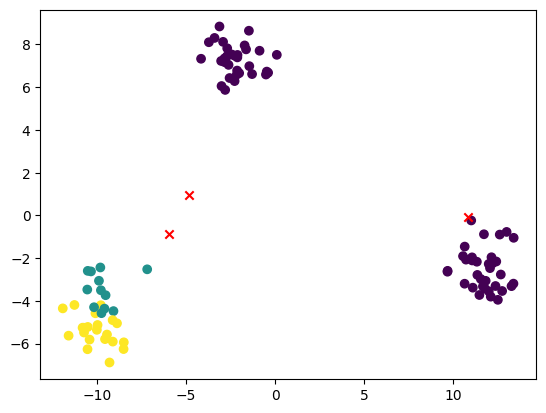

In [5]:
k = KMeans(K=3, max_iters=20, plot_steps=True)
k.train(X)



In [111]:
k.centroids,k.centroids[:,0]

(array([[1.77158064, 5.98567888],
        [0.4520136 , 5.12270482]]),
 array([1.77158064, 0.4520136 ]))